In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yzjanet","key":"c22e4eae5e5a4e63583afcf00939ec9c"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d soumikrakshit/anime-faces

100% 440M/441M [00:03<00:00, 138MB/s]
100% 441M/441M [00:03<00:00, 138MB/s]


In [ ]:
!unzip anime-faces.zip

In [ ]:
!rm /content/anime-faces.zip

In [ ]:
!rm -rf /content/data/data

In [ ]:
import tensorflow as tf
import cv2
import numpy
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import random
from PIL import Image
import os

!pip install visualkeras
import visualkeras

!pip install tensorflow_addons
import tensorflow_addons as tfa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 17.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.9 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
class Plots:
    def __init__(self):
        pass

    @staticmethod
    def plot_images_from_array(data=None, labels=None, rows=2, columns=2, figsize=(6, 6), randomize=False, update_plot=False):
        if data is None:
            return None

        fig, axs = plt.subplots(rows, columns, sharey='none', tight_layout=True, figsize=figsize, facecolor='white')

        n = 0
        for i in range(rows):
            for j in range(columns):
                if randomize:
                    axs[i, j].imshow(data[random.choice(range(len(data)-1))], cmap='gray')
                    if labels is not None: axs[i, j].set(title=labels[n])
                else:
                    axs[i, j].imshow(data[i+(j*rows)], cmap='gray')
                    if labels is not None: axs[i, j].set(title=labels[n])
                axs[i, j].axis('off')
                n = n + 1
        plt.show()

    @staticmethod
    def plot_images_from_directory(path=None, rows=2, columns=2, figsize=(6, 6), randomize=False, update_plot=False):
        if path is None:
            return None

        if path[-1] == '/':
            path_copy = path[:-1]
        else:
            path_copy = path

        file_names = [path_copy + '/' + i for i in os.listdir(path_copy)]

        fig, axs = plt.subplots(rows, columns, sharey='none', tight_layout=True, figsize=figsize, facecolor='white')

        for i in range(rows):
            for j in range(columns):
                if randomize:
                    image = Image.open(file_names[random.choice(range(len(file_names)-1))])
                    axs[i, j].imshow(image, cmap='gray')
                else:
                    image = Image.open(file_names[i+(j*rows)])
                    axs[i, j].imshow(image)
                axs[i, j].axis('off')
        plt.show()

    @staticmethod
    def plot_images_from_folder(path=None, num_images=5, figsize=(6, 6), randomize=False, update_plot=False):
        if path is None:
            return None

        if path[-1] == '/':
            path_copy = path[:-1]
        else:
            path_copy = path

        dir_names = [path_copy + '/' + i for i in os.listdir(path_copy)]

        fig, axs = plt.subplots(len(dir_names), num_images, sharey='none', tight_layout=True, figsize=figsize,
                                facecolor='white')

        for i in range(len(dir_names)):
            temp_path = dir_names[i] + '/'
            for j in range(num_images):
                if randomize:
                    image = Image.open(temp_path + random.choice(os.listdir(temp_path)))
                    axs[i, j].imshow(image)
                else:
                    image = Image.open(temp_path + os.listdir(temp_path)[j])
                    axs[i, j].imshow(image)
                axs[i, j].axis('off')
        plt.show()



class PreprocessData:
    def __init__(self):
        pass

    @staticmethod
    def load_image(path, resize_height=64, resize_width=64, d_type=False):
        image = tf.io.read_file(path)
        image = tf.io.decode_png(image)
        image = tf.image.resize(image, (resize_height, resize_width))
        if d_type:
            image = tf.cast(image, d_type)
        return image

    @staticmethod
    def normalize_values(x, to_val=(0, 1), from_val=(0, 255), d_type=False):
        if d_type:
            x = tf.cast(x, d_type)

        return (x - from_val[0]) * (to_val[1] - to_val[0]) / (from_val[1] - from_val[0]) + to_val[0]



plots = Plots()


In [ ]:
class Utils():
  def __init__(self):
    self.IMGAE_DIM = (64, 64, 3)
    pass

  def plot_images(data=None, labels=None, rows=2, columns=2, figsize=(12,6), randomize=False):
    if data is None:
      return None

    fig, axs = plt.subplots(rows, columns, sharey=False, tight_layout=True, figsize=figsize, facecolor='white')

    n=0
    for i in range(rows):
      for j in range(columns):
        if randomize:
          n = random.choice(range(len(data)))
          axs[i,j].matshow(data[n], cmap='gray')
          if labels is not None: axs[i,j].set(title=labels[n])
        else:
          axs[i,j].matshow(data[n], cmap='gray')
          if labels is not None: axs[i,j].set(title=labels[n])
        axs[i,j].axis('off')
        n=n+1
    plt.show()

  def normalize_values(x, to_val=(0, 1), from_val=(0, 255), dtype=False):
    if dtype != False:
      x = tf.cast(x, dtype)

    return (x - from_val[0]) * (to_val[1] - to_val[0]) / (from_val[1] - from_val[0]) + to_val[0]

  

  def save_plot(self, examples, epoch, n, write_video=False, no_of_frames=5):
    plt.close()
    
    examples = (examples + 1) / 2.0 # Changing pixel range [-1, 1] to [0, 1]
    
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5.12, 5.12)

    for i in range(n * n):
        plt.subplot(n, n, i+1)
        plt.axis("off")
        plt.imshow(examples[i]) 
    plt.savefig("frame.png", dpi=100)

    videowriter.write_video(path="frame.png", no_of_frames=no_of_frames)

  def plot_loss(d1_loss, d2_loss, g_loss, write_video=False, no_of_frames=5):
    plt.close()

    x = [x for x in range(1, len(d1_loss)+1)]

    fig = plt.figure(frameon=False)
    fig.set_size_inches(5.12, 5.12)

    print(d1_loss)

    plt.plot(x, d1_loss, label='d1_loss', color='b')
    plt.plot(x, d2_loss, label='d2_loss', color='c')
    plt.plot(x, g_loss, label='g_loss', color='g')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

    plt.title("Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.savefig("plot.png", dpi=100)

    videowriter.write_video(path="plot.png", no_of_frames=no_of_frames)

  def load_image(self, path, resize_height=64, resize_width=64):
    image = tf.io.read_file(path)
    image = tf.io.decode_png(image)
    image = tf.image.resize(image, (resize_height, resize_width))
    image = tf.cast(image, tf.float32)
    image = (image-127.5)/127.5
    return image

  def get_dataset(self, path, batch_size=128, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices(path)
    dataset = dataset.shuffle(buffer_size=10240)
    dataset = dataset.map(self.load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size=batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset
      

utils = Utils()

In [ ]:
class VideoWriter():
  def __init__(self):
    self.writer = None

  def create_writer(self, name, res):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    self.writer = cv2.VideoWriter(name, fourcc, 30.0, res)

  def destroy_writer(self):
    self.writer.release()
    self.writer = None

  def write_video(self, path="frame.png", no_of_frames=1, name='output.avi', res=(512, 512)):
    frame = cv2.imread("frame.png")

    if self.writer == None:
      self.create_writer(name=name, res=res)
      for i in range(no_of_frames):
        self.writer.write(frame)
    else:
      for i in range(no_of_frames):
        self.writer.write(frame)

videowriter = VideoWriter()

In [ ]:
class GAN(tf.keras.models.Model):
  def __init__(self, discriminator=None, generator=None, latent_dim=128):
      super(GAN, self).__init__()
      self.weight_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
      self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1)
      self.d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
      self.g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
      # self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True,label_smoothing=0.25)
      # self.d_optimizer = tfa.optimizers.Yogi(learning_rate=0.001)
      # self.g_optimizer = tfa.optimizers.Yogi(learning_rate=0.001)
      self.latent_dim = latent_dim

      self.d1_loss_list = []
      self.d2_loss_list = []
      self.g_loss_list = []
      
      if discriminator == None: self.discriminator = self.build_discriminator()
      else: self.discriminator = discriminator
      
      if generator == None: self.generator = self.build_generator(self.latent_dim)
      else: self.generator = generator

  def deconv_layer(self, inputs, num_filters, kernel_size, strides, batch_norm=True):
    x = tf.keras.layers.Conv2DTranspose(filters=num_filters, 
                                        kernel_size=kernel_size, 
                                        kernel_initializer=self.weight_init,
                                        padding="same",
                                        strides=strides,
                                        use_bias=False)(inputs)

    if batch_norm:
      x = tf.keras.layers.BatchNormalization()(x)
      #x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
      x = tf.keras.layers.ReLU()(x)

    return x

  def conv_layer(self, inputs, num_filters, kernel_size, padding="same", strides=2, activation=True):
    #y = tf.keras.layers.GaussianNoise(stddev=0.2)
    x = tf.keras.layers.Conv2D(filters=num_filters, 
                                kernel_size=kernel_size, 
                                kernel_initializer=self.weight_init,
                                padding=padding,
                                strides=strides)(inputs)

    if activation:
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

      x = tf.keras.layers.Dropout(0.3)(x)
      


    return x

  def build_generator(self, LATENT_DIM):
    global IMAGE_HEIGHT, IMAGE_WIDTH
    
    f = [2**i for i in range(5)][::-1]
    filters = 32
    output_strides = 16
    h_output = IMAGE_HEIGHT // output_strides
    w_output = IMAGE_WIDTH // output_strides

    noise = tf.keras.layers.Input(shape=(LATENT_DIM,), name="gen_noise_input")

    x = tf.keras.layers.Dense(f[0] * filters * h_output * w_output, use_bias=False)(noise)
    x = tf.keras.layers.BatchNormalization()(x)
    #x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Reshape((h_output, w_output, f[0] * filters))(x)

    for i in range(1, 5):
      x = self.deconv_layer(x,
                      num_filters=f[i] * filters,
                      kernel_size=5,
                      strides=2,
                      batch_norm=True)
      
    
    x = self.conv_layer(x,
                  num_filters=3,
                  kernel_size=5,
                  strides=1,
                  activation=False)

    fake_output = tf.keras.layers.Activation("tanh")(x)

    return tf.keras.models.Model(noise, fake_output, name="generator")

  def build_discriminator(self):
    global IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_COLOR
    
    f = [2**i for i in range(4)]
    filters = 64
    output_strides = 16
    h_output = IMAGE_HEIGHT // output_strides
    w_output = IMAGE_WIDTH // output_strides

    image_input = tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_COLOR), name="Images")
    x = image_input
    #x = tf.keras.layers.GaussianNoise(stddev=0.2)(x)

    for i in range(0, 4):
      

      x = self.conv_layer(x,
                    num_filters=f[i] * filters,
                    kernel_size=5,
                    strides=2)
      #x = tf.keras.layers.GaussianNoise(stddev=0.2)(x)
      
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=1)(x)

    return tf.keras.models.Model(image_input, x, name="discriminator")
  
  def compile(self, d_optimizer, g_optimizer, loss_fn):
      super(GAN, self).compile(run_eagerly=True)
      self.d_optimizer = d_optimizer
      self.g_optimizer = g_optimizer
      self.loss_fn = loss_fn
       
  def train_step(self, real_images):
      batch_size = tf.shape(real_images)[0]

      for _ in range(2):
          ## Train the discriminator
          random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
          generated_images = self.generator(random_latent_vectors)
          generated_labels = tf.zeros((batch_size, 1))

          with tf.GradientTape() as ftape:
              predictions = self.discriminator(generated_images)
              d1_loss = self.loss_fn(generated_labels, predictions)
          grads = ftape.gradient(d1_loss, self.discriminator.trainable_weights)
          self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

          ## Train the discriminator
          labels = tf.ones((batch_size, 1))

          with tf.GradientTape() as rtape:
              predictions = self.discriminator(real_images)
              d2_loss = self.loss_fn(labels, predictions)
          grads = rtape.gradient(d2_loss, self.discriminator.trainable_weights)
          self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

      ## Train the generator
      random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
      misleading_labels = tf.ones((batch_size, 1))

      with tf.GradientTape() as gtape:
          predictions = self.discriminator(self.generator(random_latent_vectors))
          g_loss = self.loss_fn(misleading_labels, predictions)
      grads = gtape.gradient(g_loss, self.generator.trainable_weights)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

      
      self.d1_loss_list.append(np.array(d1_loss).mean())
      self.d2_loss_list.append(np.array(d2_loss).mean())
      self.g_loss_list.append(np.array(g_loss).mean())

      return {"d1_loss": d1_loss, "d2_loss": d2_loss, "g_loss": g_loss}

In [ ]:
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
IMAGE_COLOR = 3

In [ ]:
images_path = glob("/content/data/*")
images_path

['/content/data/18151.png',
 '/content/data/7620.png',
 '/content/data/8184.png',
 '/content/data/8930.png',
 '/content/data/2999.png',
 '/content/data/19949.png',
 '/content/data/10443.png',
 '/content/data/17580.png',
 '/content/data/20844.png',
 '/content/data/20461.png',
 '/content/data/3362.png',
 '/content/data/967.png',
 '/content/data/14513.png',
 '/content/data/4916.png',
 '/content/data/16506.png',
 '/content/data/19498.png',
 '/content/data/12500.png',
 '/content/data/19263.png',
 '/content/data/20344.png',
 '/content/data/8361.png',
 '/content/data/3913.png',
 '/content/data/6158.png',
 '/content/data/12913.png',
 '/content/data/9161.png',
 '/content/data/15700.png',
 '/content/data/2603.png',
 '/content/data/14337.png',
 '/content/data/7480.png',
 '/content/data/18497.png',
 '/content/data/13060.png',
 '/content/data/3500.png',
 '/content/data/9937.png',
 '/content/data/20859.png',
 '/content/data/12708.png',
 '/content/data/10170.png',
 '/content/data/12357.png',
 '/conte

In [ ]:
dataset = utils.get_dataset(images_path)

In [ ]:
gan = GAN()

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
gan.compile(gan.d_optimizer, gan.g_optimizer, gan.loss_fn)

In [ ]:
for epoch in range(100):
  gan.fit(dataset, epochs=1)

  n_samples = 25
  noise = np.random.normal(size=(n_samples, gan.latent_dim))
  examples = gan.generator.predict(noise)
  utils.save_plot(examples, epoch, int(np.sqrt(n_samples)))
  # utils.plot_loss(d1_loss=gan.d1_loss_list, d2_loss=gan.d2_loss_list, g_loss=gan.g_loss_list, write_video=True)

 49/169 [=======>......................] - ETA: 59s - d1_loss: 0.2006 - d2_loss: 0.2017 - g_loss: 2.7993 

# loss function ()

In [ ]:
import pandas as pd
df = pd.DataFrame({'d1_loss':gan.d1_loss_list, 'd2_loss':gan.d2_loss_list, 'g_loss':gan.g_loss_list})

<Axes: >

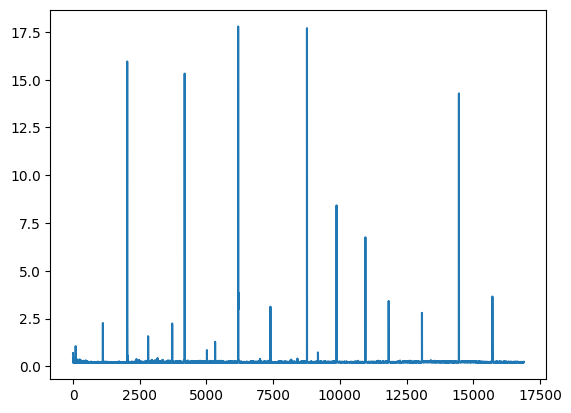

In [ ]:
df['d1_loss'].plot()

<Axes: >

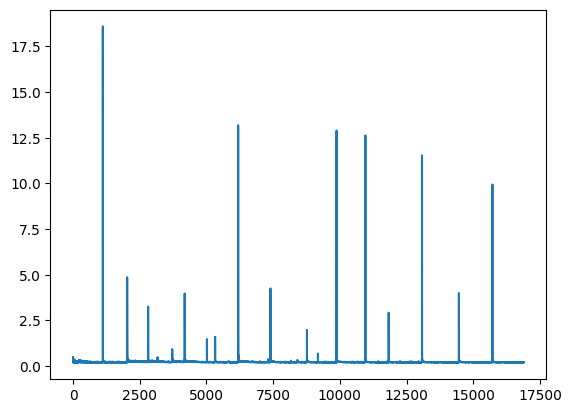

In [ ]:
df['d2_loss'].plot()

<Axes: >

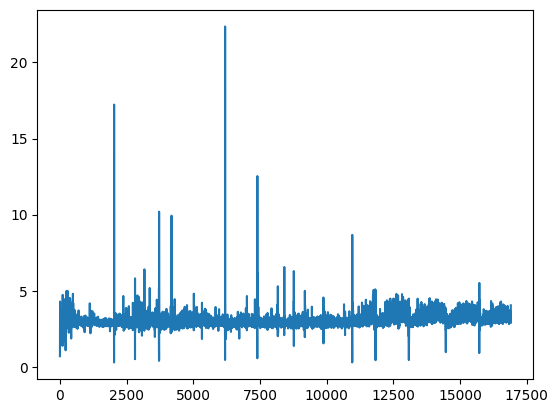

In [ ]:
df['g_loss'].plot()

In [ ]:
df.to_csv('loss_opt2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- yogi optimizer failed why? Adam

In [ ]:
gan.generator.save('generator.h5')
gan.discriminator.save('discriminator.h5')

In [ ]:
g11 = generator.h5

In [ ]:
.summary()

sigmoid , and lossfunction 

In [ ]:
class Utils():
  def __init__(self):
    self.IMGAE_DIM = (64, 64, 3)
    pass

  def load_image(self, path, resize_height=64, resize_width=64):
    image = tf.io.read_file(path)
    image = tf.io.decode_png(image)
    image = tf.image.resize(image, (resize_height, resize_width))
    image = tf.cast(image, tf.float32)
    image = (image-127.5)/127.5
    return image

  def get_dataset(self, path, batch_size=128, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices(path)
    dataset = dataset.shuffle(buffer_size=1024)
    dataset = dataset.map(self.load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size=batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

  def save_plot(self, examples, epoch, n, write_video=False, no_of_frames=5):
    plt.close()
    
    examples = (examples + 1) / 2.0 # Changing pixel range [-1, 1] to [0, 1]
    
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5.12, 5.12)

    for i in range(n * n):
        plt.subplot(n, n, i+1)
        plt.axis("off")
        plt.imshow(examples[i]) 
    plt.savefig("frame.png", dpi=100)

    videowriter.write_video(path="frame.png", no_of_frames=no_of_frames)

  def plot_loss(d1_loss, d2_loss, g_loss, write_video=False, no_of_frames=5):
    plt.close()

    x = [x for x in range(1, len(d1_loss)+1)]

    fig = plt.figure(frameon=False)
    fig.set_size_inches(5.12, 5.12)

    print(d1_loss)

    plt.plot(x, d1_loss, label='d1_loss', color='b')
    plt.plot(x, d2_loss, label='d2_loss', color='c')
    plt.plot(x, g_loss, label='g_loss', color='g')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

    plt.title("Losses")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.savefig("plot.png", dpi=100)

    videowriter.write_video(path="plot.png", no_of_frames=no_of_frames)
      

utils = Utils()
     

class VideoWriter():
  def __init__(self):
    self.writer = None

  def create_writer(self, name, res):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    self.writer = cv2.VideoWriter(name, fourcc, 30.0, res)

  def destroy_writer(self):
    self.writer.release()
    self.writer = None

  def write_video(self, path="frame.png", no_of_frames=1, name='output.avi', res=(512, 512)):
    frame = cv2.imread("frame.png")

    if self.writer == None:
      self.create_writer(name=name, res=res)
      for i in range(no_of_frames):
        self.writer.write(frame)
    else:
      for i in range(no_of_frames):
        self.writer.write(frame)

videowriter = VideoWriter()
     


     

class GAN(tf.keras.models.Model):
  def __init__(self, discriminator=None, generator=None, latent_dim=128):
      super(GAN, self).__init__()
      self.weight_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
      self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1)
      self.d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
      self.g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
      self.latent_dim = latent_dim

      self.d1_loss_list = []
      self.d2_loss_list = []
      self.g_loss_list = []
      
      if discriminator == None: self.discriminator = self.build_discriminator()
      else: self.discriminator = discriminator
      
      if generator == None: self.generator = self.build_generator(self.latent_dim)
      else: self.generator = generator

  def deconv_layer(self, inputs, num_filters, kernel_size, strides, batch_norm=True):
    x = tf.keras.layers.Conv2DTranspose(filters=num_filters, 
                                        kernel_size=kernel_size, 
                                        kernel_initializer=self.weight_init,
                                        padding="same",
                                        strides=strides,
                                        use_bias=False)(inputs)

    if batch_norm:
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)

    return x

  def conv_layer(self, inputs, num_filters, kernel_size, padding="same", strides=2, activation=True):
    x = tf.keras.layers.Conv2D(filters=num_filters, 
                                kernel_size=kernel_size, 
                                kernel_initializer=self.weight_init,
                                padding=padding,
                                strides=strides)(inputs)

    if activation:
      x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
      x = tf.keras.layers.Dropout(0.3)(x)

    return x

  def build_generator(self, LATENT_DIM):
    global IMAGE_HEIGHT, IMAGE_WIDTH
    
    f = [2**i for i in range(5)][::-1]
    filters = 32
    output_strides = 16
    h_output = IMAGE_HEIGHT // output_strides
    w_output = IMAGE_WIDTH // output_strides

    noise = tf.keras.layers.Input(shape=(LATENT_DIM,), name="gen_noise_input")

    x = tf.keras.layers.Dense(f[0] * filters * h_output * w_output, use_bias=False)(noise)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Reshape((h_output, w_output, f[0] * filters))(x)

    for i in range(1, 5):
      x = self.deconv_layer(x,
                      num_filters=f[i] * filters,
                      kernel_size=5,
                      strides=2,
                      batch_norm=True)
      
    
    x = self.conv_layer(x,
                  num_filters=3,
                  kernel_size=5,
                  strides=1,
                  activation=False)

    fake_output = tf.keras.layers.Activation("tanh")(x)

    return tf.keras.models.Model(noise, fake_output, name="generator")

  def build_discriminator(self):
    global IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_COLOR
    
    f = [2**i for i in range(4)]
    filters = 64
    output_strides = 16
    h_output = IMAGE_HEIGHT // output_strides
    w_output = IMAGE_WIDTH // output_strides

    image_input = tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_COLOR), name="Images")
    x = image_input

    for i in range(0, 4):
      x = self.conv_layer(x,
                    num_filters=f[i] * filters,
                    kernel_size=5,
                    strides=2)
      
      x = tf.keras.layers.Flatten()(x)
      x = tf.keras.layers.Dense(1)(x)

      return tf.keras.models.Model(image_input, x, name="discriminator")
  
  def compile(self, d_optimizer, g_optimizer, loss_fn):
      super(GAN, self).compile(run_eagerly=True)
      self.d_optimizer = d_optimizer
      self.g_optimizer = g_optimizer
      self.loss_fn = loss_fn
       
  def train_step(self, real_images):
      batch_size = tf.shape(real_images)[0]

      for _ in range(2):
          ## Train the discriminator
          random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
          generated_images = self.generator(random_latent_vectors)
          generated_labels = tf.zeros((batch_size, 1))

          with tf.GradientTape() as ftape:
              predictions = self.discriminator(generated_images)
              d1_loss = self.loss_fn(generated_labels, predictions)
          grads = ftape.gradient(d1_loss, self.discriminator.trainable_weights)
          self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

          ## Train the discriminator
          labels = tf.ones((batch_size, 1))

          with tf.GradientTape() as rtape:
              predictions = self.discriminator(real_images)
              d2_loss = self.loss_fn(labels, predictions)
          grads = rtape.gradient(d2_loss, self.discriminator.trainable_weights)
          self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

      ## Train the generator
      random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
      misleading_labels = tf.ones((batch_size, 1))

      with tf.GradientTape() as gtape:
          predictions = self.discriminator(self.generator(random_latent_vectors))
          g_loss = self.loss_fn(misleading_labels, predictions)
      grads = gtape.gradient(g_loss, self.generator.trainable_weights)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

      
      self.d1_loss_list.append(np.array(d1_loss).mean())
      self.d2_loss_list.append(np.array(d2_loss).mean())
      self.g_loss_list.append(np.array(g_loss).mean())

      return {"d1_loss": d1_loss, "d2_loss": d2_loss, "g_loss": g_loss}
     

IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
IMAGE_COLOR = 3
     

images_path = glob("/content/data/*")
len(images_path)
     
21551

dataset = utils.get_dataset(images_path)
     

gan = GAN()
     

gan.compile(gan.d_optimizer, gan.g_optimizer, gan.loss_fn)
     

for epoch in range(100):
  gan.fit(dataset, epochs=1)

  n_samples = 25
  noise = np.random.normal(size=(n_samples, gan.latent_dim))
  examples = gan.generator.predict(noise)
  utils.save_plot(examples, epoch, int(np.sqrt(n_samples)))